In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")


In [3]:
match = pd.read_csv("../data/Match_Info.csv")
balls = pd.read_csv("../data/Ball_By_Ball_Match_Data.csv")
players = pd.read_csv("../data/2024_players_details.csv")
teams = pd.read_csv("../data/teams_info.csv")


In [4]:
match.head()
balls.head()
players.head()


,ID,Name,longName,battingName,fieldingName,imgUrl,dob,battingStyles,longBattingStyles,bowlingStyles,longBowlingStyles,playingRoles,espn_url
0,95094,RD Gaikwad,Ruturaj Gaikwad,RD Gaikwad,Gaikwad,"https://img1.hscicdn.com/image/upload/f_auto,t...",31/1/1997,rhb,right-hand bat,ob,right-arm offbreak,ob,https://www.espncricinfo.com/cricketers/rutura...
1,46597,MM Ali,Moeen Ali,MM Ali,Ali,"https://img1.hscicdn.com/image/upload/f_auto,t...",18/6/1987,lhb,left-hand bat,ob,right-arm offbreak,ob,https://www.espncricinfo.com/cricketers/moeen-...
2,116328,Aravelly Avanish,Aravelly Avanish,Aravelly Avanish,Aravelly Avanish,"https://img1.hscicdn.com/image/upload/f_auto,t...",2/6/2005,lhb,left-hand bat,Na,Na,NaN,https://www.espncricinfo.com/cricketers/aravel...
3,62022,DL Chahar,Deepak Chahar,DL Chahar,Chahar,"https://img1.hscicdn.com/image/upload/f_auto,t...",7/8/1992,rhb,right-hand bat,rm,right-arm medium,rm,https://www.espncricinfo.com/cricketers/deepak...
4,80607,TU Deshpande,Tushar Deshpande,TU Deshpande,Deshpande,"https://img1.hscicdn.com/image/upload/f_auto,t...",15/5/1995,lhb,left-hand bat,rm,right-arm medium,rm,https://www.espncricinfo.com/cricketers/tushar...


In [5]:
# Matches where toss winner also won the match
toss_win_match = match[match["toss_winner"] == match["winner"]]

toss_win_percentage = (len(toss_win_match) / len(match)) * 100

print(f"Toss winner also won the match in {toss_win_percentage:.2f}% of matches")


Toss winner also won the match in 50.05% of matches


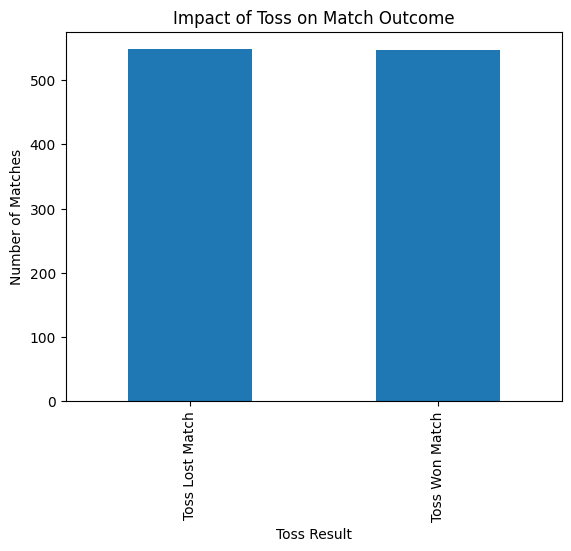

In [6]:
toss_result = match["toss_winner"] == match["winner"]

toss_counts = toss_result.value_counts()
toss_counts.index = ["Toss Lost Match", "Toss Won Match"]

toss_counts.plot(kind="bar")
plt.title("Impact of Toss on Match Outcome")
plt.ylabel("Number of Matches")
plt.xlabel("Toss Result")
plt.show()


In [7]:
plt.figure()
toss_counts.plot(kind="bar")
plt.title("Impact of Toss on Match Outcome")
plt.ylabel("Number of Matches")
plt.xlabel("Toss Result")
plt.savefig("../images/toss_vs_match_outcome.png")
plt.close()


In [15]:
valid_matches["winner_batted_second"].value_counts()



winner_batted_second
True     584
False    492
Name: count, dtype: int64

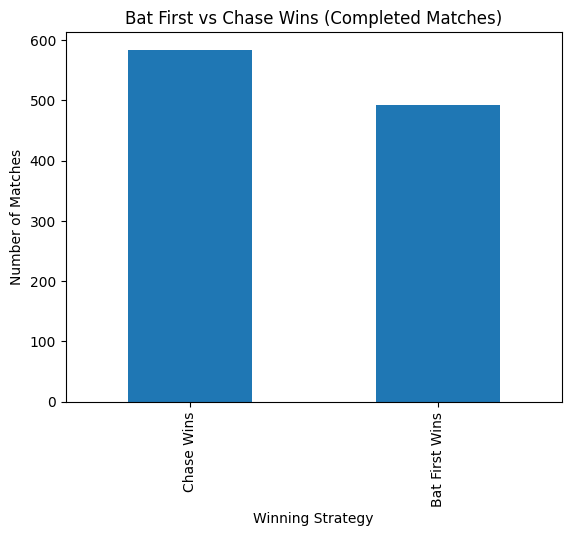

In [16]:
counts = valid_matches["winner_batted_second"].value_counts()

counts = counts.rename({
    True: "Chase Wins",
    False: "Bat First Wins"
})

counts.plot(kind="bar")
plt.title("Bat First vs Chase Wins (Completed Matches)")
plt.ylabel("Number of Matches")
plt.xlabel("Winning Strategy")
plt.show()


In [17]:
plt.figure()
counts.plot(kind="bar")
plt.title("Bat First vs Chase Wins (Completed Matches)")
plt.ylabel("Number of Matches")
plt.xlabel("Winning Strategy")
plt.savefig("../images/bat_vs_chase.png")
plt.close()


In [18]:
# Group by venue and calculate chasing wins
venue_stats = valid_matches.groupby("venue").agg(
    total_matches=("winner_batted_second", "count"),
    chase_wins=("winner_batted_second", "sum")
).reset_index()

# Calculate chase win percentage
venue_stats["chase_win_pct"] = (
    venue_stats["chase_wins"] / venue_stats["total_matches"] * 100
)


In [19]:
venue_stats_filtered = venue_stats[venue_stats["total_matches"] >= 20]


In [20]:
top_chase_venues = venue_stats_filtered.sort_values(
    by="chase_win_pct", ascending=False
)

top_chase_venues.head(10)


,venue,total_matches,chase_wins,chase_win_pct
46,Sawai Mansingh Stadium,47,32,68.085106
49,Sharjah Cricket Stadium,28,18,64.285714
30,Maharashtra Cricket Association Stadium,22,14,63.636364
32,"Narendra Modi Stadium, Ahmedabad",24,15,62.500000
14,Eden Gardens,77,47,61.038961
42,"Rajiv Gandhi International Stadium, Uppal",48,29,60.416667
56,"Wankhede Stadium, Mumbai",45,27,60.000000
50,Sheikh Zayed Stadium,27,16,59.259259
23,M Chinnaswamy Stadium,62,36,58.064516
40,"Punjab Cricket Association Stadium, Mohali",35,20,57.142857


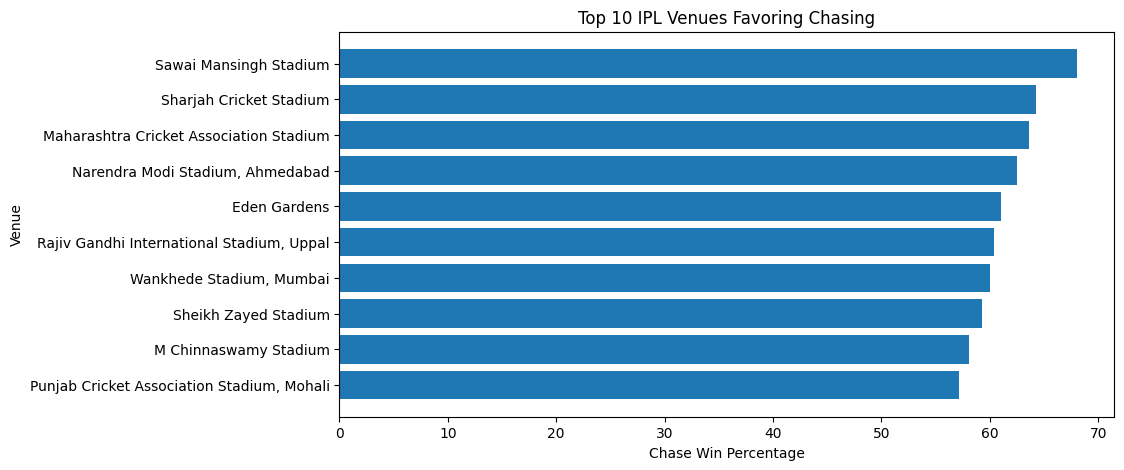

In [21]:
top10 = top_chase_venues.head(10)

plt.figure(figsize=(10, 5))
plt.barh(top10["venue"], top10["chase_win_pct"])
plt.xlabel("Chase Win Percentage")
plt.ylabel("Venue")
plt.title("Top 10 IPL Venues Favoring Chasing")
plt.gca().invert_yaxis()
plt.show()


In [22]:
plt.figure(figsize=(10, 5))
plt.barh(top10["venue"], top10["chase_win_pct"])
plt.xlabel("Chase Win Percentage")
plt.ylabel("Venue")
plt.title("Top 10 IPL Venues Favoring Chasing")
plt.gca().invert_yaxis()
plt.savefig("../images/venue_chase_advantage.png", bbox_inches="tight")
plt.close()


In [30]:
batter_stats = balls.groupby("Batter").agg(
    runs=("BatsmanRun", "sum"),
    balls_faced=("BallNumber", "count"),
    dismissals=("IsWicketDelivery", "sum"),
    innings=("Innings", "nunique")
).reset_index()

# Strike Rate
batter_stats["strike_rate"] = (
    batter_stats["runs"] / batter_stats["balls_faced"] * 100
)

batter_stats.head()



,Batter,runs,balls_faced,dismissals,innings,strike_rate
0,A Ashish Reddy,280,196,15,2,142.857143
1,A Badoni,634,505,26,2,125.544554
2,A Chandila,4,7,1,1,57.142857
3,A Chopra,53,75,5,2,70.666667
4,A Choudhary,25,20,2,2,125.000000


In [26]:
batter_stats = batter_stats[
    (batter_stats["balls_faced"] >= 300) &
    (batter_stats["innings"] >= 10)
]


In [33]:
top_batters = (
    batter_stats
    .sort_values("strike_rate", ascending=False)
    .head(10)
)
top_batters



,Batter,runs,balls_faced,dismissals,innings,strike_rate
312,L Wood,9,3,0,1,300.000000
97,B Stanlake,5,2,0,1,250.000000
234,J Fraser-McGurk,330,150,8,2,220.000000
461,R Sai Kishore,13,6,1,1,216.666667
629,Umar Gul,39,19,3,2,205.263158
497,RS Sodhi,4,2,0,1,200.000000
583,Shahid Afridi,81,46,8,2,176.086957
222,I Malhotra,7,4,0,1,175.000000
652,WG Jacks,230,133,6,2,172.932331
433,PD Salt,653,385,20,2,169.610390


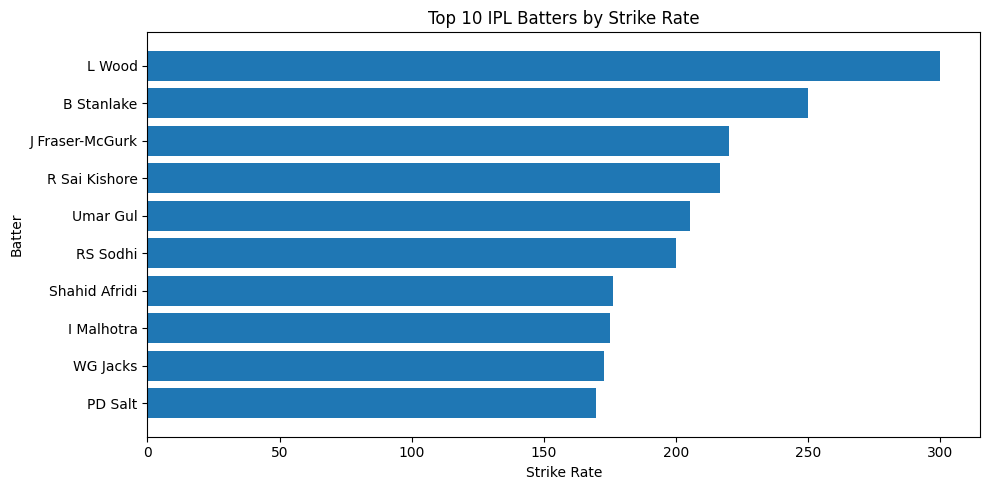

In [35]:
plt.figure(figsize=(10, 5))
plt.barh(
    top_batters["Batter"].values,
    top_batters["strike_rate"].values
)
plt.xlabel("Strike Rate")
plt.ylabel("Batter")
plt.title("Top 10 IPL Batters by Strike Rate")
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig("top_10_batters_strike_rate.png", dpi=300)
plt.show()


In [32]:
print(batter_stats.shape)
batter_stats.head()


(673, 6)


,Batter,runs,balls_faced,dismissals,innings,strike_rate
0,A Ashish Reddy,280,196,15,2,142.857143
1,A Badoni,634,505,26,2,125.544554
2,A Chandila,4,7,1,1,57.142857
3,A Chopra,53,75,5,2,70.666667
4,A Choudhary,25,20,2,2,125.000000


In [36]:
top_batters.to_csv("top_10_batters.csv", index=False)

In [37]:
chasing_balls = balls[balls["Innings"] == 2]


In [38]:
chasing_batter_stats = chasing_balls.groupby("Batter").agg(
    runs=("BatsmanRun", "sum"),
    balls_faced=("BallNumber", "count"),
    dismissals=("IsWicketDelivery", "sum")
).reset_index()

chasing_batter_stats["strike_rate"] = (
    chasing_batter_stats["runs"] /
    chasing_batter_stats["balls_faced"] * 100
)


In [39]:
chasing_batter_stats = chasing_batter_stats[
    chasing_batter_stats["balls_faced"] >= 100
]


In [40]:
top_chasers = chasing_batter_stats.sort_values(
    by="strike_rate", ascending=False
).head(10)

top_chasers


,Batter,runs,balls_faced,dismissals,strike_rate
557,T Stubbs,199,110,3,180.909091
394,PJ Cummins,258,143,16,180.419580
562,TH David,417,235,13,177.446809
567,TM Head,172,101,6,170.297030
460,Rashid Khan,342,201,19,170.149254
393,PD Salt,379,223,8,169.955157
294,LS Livingstone,408,247,14,165.182186
360,N Pooran,1000,613,29,163.132137
37,AD Russell,1089,677,43,160.856721
243,K Gowtham,178,112,9,158.928571


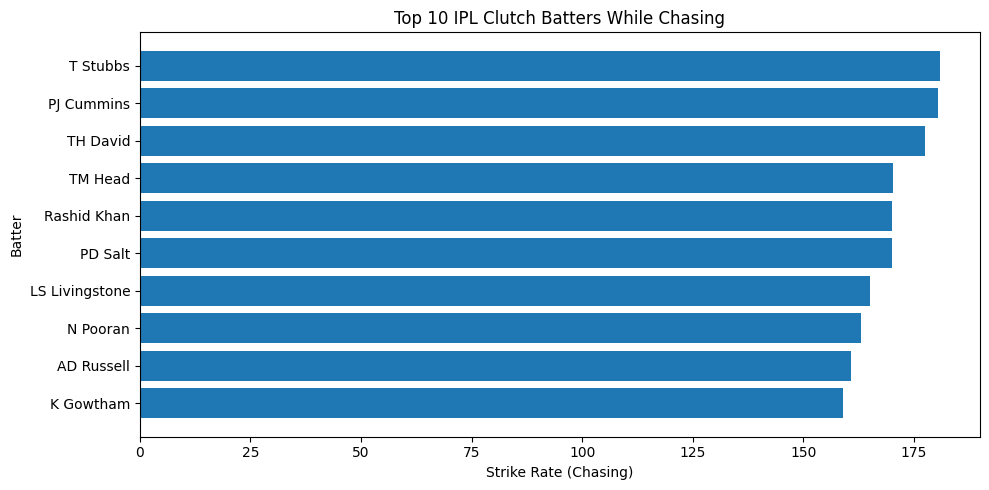

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(top_chasers["Batter"], top_chasers["strike_rate"])
plt.xlabel("Strike Rate (Chasing)")
plt.ylabel("Batter")
plt.title("Top 10 IPL Clutch Batters While Chasing")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_clutch_batters_chasing.png", dpi=300)
plt.show()


In [45]:
match = match.rename(columns={
    "match_number": "ID",
    "winner": "WinningTeam"
})



In [47]:
balls = balls.merge(
    match[["ID", "WinningTeam"]],
    on="ID",
    how="left"
)


In [48]:
balls[["ID", "BattingTeam", "WinningTeam"]].head()


,ID,BattingTeam,WinningTeam
0,829711,Chennai Super Kings,Chennai Super Kings
1,829711,Chennai Super Kings,Chennai Super Kings
2,829711,Chennai Super Kings,Chennai Super Kings
3,829711,Chennai Super Kings,Chennai Super Kings
4,829711,Chennai Super Kings,Chennai Super Kings


In [49]:
winning_balls = balls[
    balls["BattingTeam"] == balls["WinningTeam"]
]


In [50]:
winning_batter_stats = winning_balls.groupby("Batter").agg(
    runs=("BatsmanRun", "sum"),
    balls_faced=("BallNumber", "count"),
    matches_won=("ID", "nunique")
).reset_index()

winning_batter_stats["strike_rate"] = (
    winning_batter_stats["runs"] /
    winning_batter_stats["balls_faced"] * 100
)


In [51]:
winning_batter_stats = winning_batter_stats[
    (winning_batter_stats["balls_faced"] >= 100) &
    (winning_batter_stats["matches_won"] >= 5)
]


In [52]:
top_winners = winning_batter_stats.sort_values(
    by="runs", ascending=False
).head(10)

top_winners


,Batter,runs,balls_faced,matches_won,strike_rate
468,V Kohli,4205,3110,114,135.209003
376,S Dhawan,3945,3066,111,128.669276
348,RG Sharma,3922,2963,129,132.365845
104,DA Warner,3710,2501,79,148.340664
399,SK Raina,3559,2647,118,134.454099
87,CH Gayle,3116,2026,66,153.800592
272,MS Dhoni,3007,2089,124,143.944471
19,AB de Villiers,2967,1825,74,162.575342
135,G Gambhir,2839,2332,85,121.740995
132,F du Plessis,2751,2120,75,129.764151


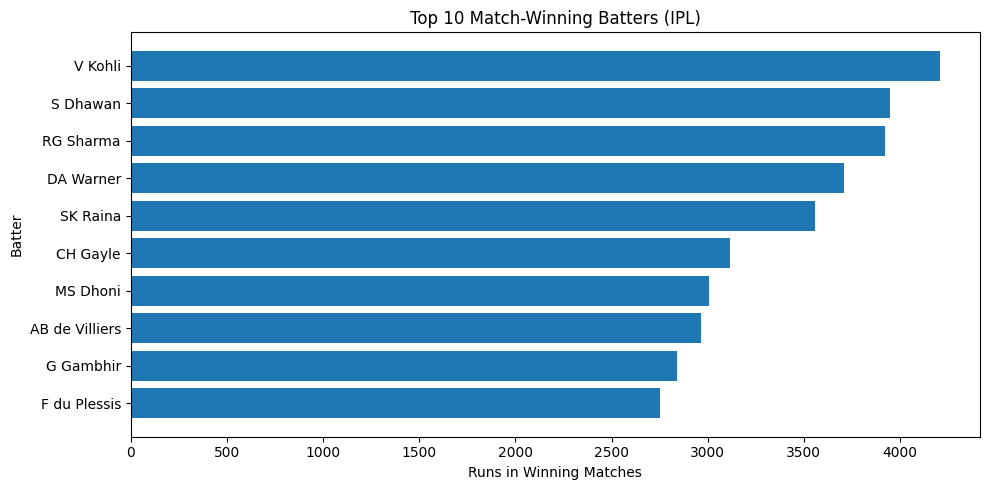

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(top_winners["Batter"], top_winners["runs"])
plt.xlabel("Runs in Winning Matches")
plt.ylabel("Batter")
plt.title("Top 10 Match-Winning Batters (IPL)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_match_winning_batters.png", dpi=300)
plt.show()


In [55]:
death_overs = balls[
    (balls["Overs"] >= 16) & (balls["Overs"] <= 20)
]



In [56]:
death_overs.head()


,ID,Innings,Overs,BallNumber,Batter,Bowler,NonStriker,ExtraType,BatsmanRun,ExtrasRun,TotalRun,IsWicketDelivery,PlayerOut,Kind,FieldersInvolved,BattingTeam,WinningTeam
103,829711,1,16,1,MS Dhoni,B Kumar,BB McCullum,NaN,2,0,2,0,NaN,NaN,NaN,Chennai Super Kings,Chennai Super Kings
104,829711,1,16,2,MS Dhoni,B Kumar,BB McCullum,NaN,6,0,6,0,NaN,NaN,NaN,Chennai Super Kings,Chennai Super Kings
105,829711,1,16,3,MS Dhoni,B Kumar,BB McCullum,NaN,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings,Chennai Super Kings
106,829711,1,16,4,MS Dhoni,B Kumar,BB McCullum,NaN,1,0,1,0,NaN,NaN,NaN,Chennai Super Kings,Chennai Super Kings
107,829711,1,16,5,BB McCullum,B Kumar,MS Dhoni,wides,0,1,1,0,NaN,NaN,NaN,Chennai Super Kings,Chennai Super Kings


In [57]:
death_bowler_stats = death_overs.groupby("Bowler").agg(
    runs_conceded=("TotalRun", "sum"),
    balls_bowled=("BallNumber", "count"),
    wickets=("IsWicketDelivery", "sum"),
    matches=("ID", "nunique")
).reset_index()


In [58]:
death_bowler_stats["overs_bowled"] = death_bowler_stats["balls_bowled"] / 6

death_bowler_stats["economy"] = (
    death_bowler_stats["runs_conceded"] /
    death_bowler_stats["overs_bowled"]
)


In [59]:
death_bowler_stats = death_bowler_stats[
    (death_bowler_stats["balls_bowled"] >= 120) &  # at least 20 overs
    (death_bowler_stats["matches"] >= 10)
]


In [60]:
top_death_bowlers = death_bowler_stats.sort_values(
    by="economy"
).head(10)

top_death_bowlers


,Bowler,runs_conceded,balls_bowled,wickets,matches,overs_bowled,economy
93,DE Bollinger,268,216,26,24,36.000000,7.444444
309,Rashid Khan,408,315,28,48,52.500000,7.771429
341,SL Malinga,1252,965,104,109,160.833333,7.784456
348,SP Narine,1003,755,69,96,125.833333,7.970861
210,M Pathirana,300,225,26,19,37.500000,8.000000
402,WD Parnell,268,199,20,25,33.166667,8.080402
357,SW Tait,182,134,14,17,22.333333,8.149254
151,JJ Bumrah,1601,1163,89,120,193.833333,8.259673
105,DP Nannes,267,193,20,26,32.166667,8.300518
208,M Muralitharan,226,162,14,25,27.000000,8.370370


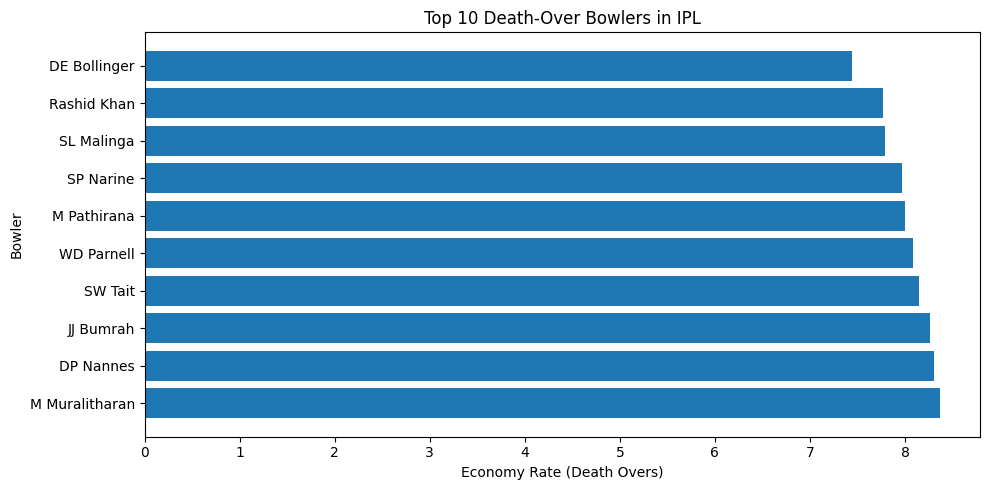

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(
    top_death_bowlers["Bowler"],
    top_death_bowlers["economy"]
)
plt.xlabel("Economy Rate (Death Overs)")
plt.ylabel("Bowler")
plt.title("Top 10 Death-Over Bowlers in IPL")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_death_over_bowlers.png", dpi=300)
plt.show()


In [62]:
batting = balls.groupby("Batter").agg(
    bat_runs=("BatsmanRun", "sum"),
    bat_balls=("BallNumber", "count")
).reset_index()

batting["bat_strike_rate"] = (
    batting["bat_runs"] / batting["bat_balls"] * 100
)


In [63]:
bowling = balls.groupby("Bowler").agg(
    runs_conceded=("TotalRun", "sum"),
    balls_bowled=("BallNumber", "count"),
    wickets=("IsWicketDelivery", "sum")
).reset_index()

bowling["overs"] = bowling["balls_bowled"] / 6
bowling["economy"] = bowling["runs_conceded"] / bowling["overs"]


In [64]:
all_rounders = batting.merge(
    bowling,
    left_on="Batter",
    right_on="Bowler",
    how="inner"
)


In [65]:
all_rounders["impact_score"] = (
    (all_rounders["bat_runs"] * 0.4) +
    (all_rounders["bat_strike_rate"] * 0.3) +
    (all_rounders["wickets"] * 20) -
    (all_rounders["economy"] * 10)
)


In [66]:
all_rounders = all_rounders[
    (all_rounders["bat_balls"] >= 100) &
    (all_rounders["balls_bowled"] >= 100)
]


In [67]:
top_all_rounders = all_rounders.sort_values(
    by="impact_score",
    ascending=False
).head(10)

top_all_rounders[[
    "Batter",
    "bat_runs",
    "bat_strike_rate",
    "wickets",
    "economy",
    "impact_score"
]]


,Batter,bat_runs,bat_strike_rate,wickets,economy,impact_score
108,DJ Bravo,1560,125.100241,207,8.075243,4720.777645
396,SP Narine,1534,155.894309,200,6.761216,4592.756136
332,RA Jadeja,2959,124.432296,169,7.574326,4525.186428
315,R Ashwin,800,114.613181,198,6.969438,4244.689575
308,PP Chawla,624,107.586207,201,7.977920,4222.096658
65,B Kumar,306,90.532544,195,7.464532,3974.914443
8,A Mishra,381,86.590909,183,7.304878,3765.328492
389,SL Malinga,88,85.436893,188,7.032952,3750.501545
399,SR Watson,3880,134.163209,107,7.698643,3655.262533
148,Harbhajan Singh,833,130.974843,161,7.038330,3522.109158


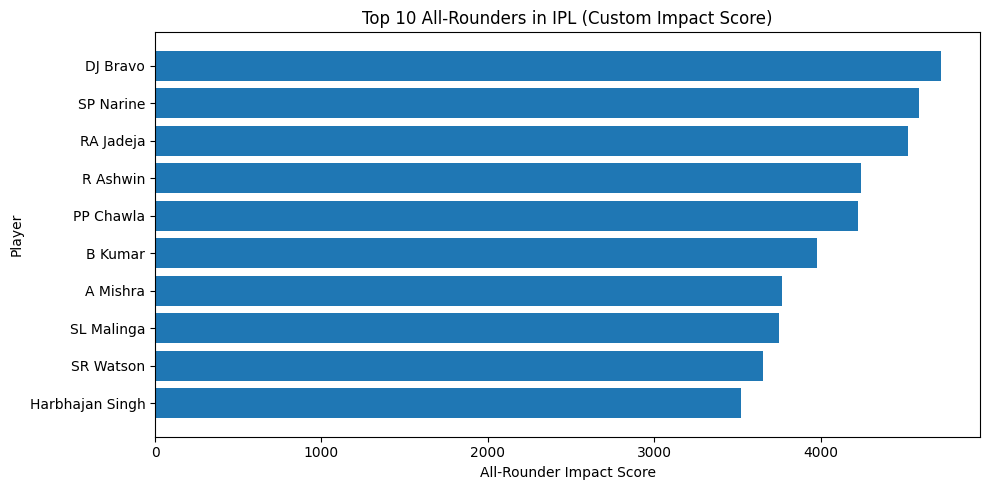

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(
    top_all_rounders["Batter"],
    top_all_rounders["impact_score"]
)
plt.xlabel("All-Rounder Impact Score")
plt.ylabel("Player")
plt.title("Top 10 All-Rounders in IPL (Custom Impact Score)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_all_rounders_impact.png", dpi=300)
plt.show()


In [69]:
ml_df = match[[
    "team1",
    "team2",
    "toss_winner",
    "toss_decision",
    "venue",
    "city",
    "WinningTeam"
]].dropna()

ml_df.head()



,team1,team2,toss_winner,toss_decision,venue,city,WinningTeam
0,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,"MA Chidambaram Stadium, Chepauk",Chennai,Chennai Super Kings
1,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,Royal Challengers Bangalore
2,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Kings XI Punjab
3,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Maharashtra Cricket Association Stadium,Pune,Rising Pune Supergiant
5,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,bat,Shaheed Veer Narayan Singh International Stadium,Raipur,Delhi Daredevils


In [90]:
import pandas as pd
print(match.columns.tolist())


['ID', 'team1', 'team2', 'match_date', 'toss_winner', 'toss_decision', 'result', 'eliminator', 'WinningTeam', 'player_of_match', 'venue', 'city', 'team1_players', 'team2_players', 'winner_batted_second']


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Pre-match features only
ml_df = match[[
    "team1", "team2", "toss_winner", "toss_decision", "venue", "city", "WinningTeam"
]].dropna()

# Target: 1 if team1 wins, 0 if team2 wins
ml_df["winner_team1"] = (ml_df["WinningTeam"] == ml_df["team1"]).astype(int)

# Features
X = ml_df[["team1", "team2", "toss_winner", "toss_decision", "venue", "city"]]
y = ml_df["winner_team1"]

# One-hot encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Random Forest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
feature_names = encoder.get_feature_names_out()
importance = model.feature_importances_

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importance
}).sort_values("importance", ascending=False)

print(importance_df.head(10))


Accuracy: 0.46601941747572817
              precision    recall  f1-score   support

           0       0.43      0.44      0.43        96
           1       0.50      0.49      0.50       110

    accuracy                           0.47       206
   macro avg       0.46      0.46      0.46       206
weighted avg       0.47      0.47      0.47       206

                              feature  importance
58                toss_decision_field    0.027345
57                  toss_decision_bat    0.026170
29               team2_Mumbai Indians    0.021838
19          team2_Chennai Super Kings    0.019833
27        team2_Kolkata Knight Riders    0.019623
25              team2_Kings XI Punjab    0.019156
35  team2_Royal Challengers Bangalore    0.019108
37          team2_Sunrisers Hyderabad    0.019078
32             team2_Rajasthan Royals    0.018968
46  toss_winner_Kolkata Knight Riders    0.017200
